# Decision Tree

### Predictors: Numerical Variables + Useful Variables from Clustering/Correlation (including Fedu)

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
student_por = pd.read_csv('student-por.csv',sep=';')
student_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [3]:
student_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

### The ordinal variables are converted from integer data type to object data type, as they are categorical.

In [4]:
student_por['failures'] = student_por['failures'].astype(float)
student_por['absences'] = student_por['absences'].astype(float)
student_por['G1'] = student_por['G1'].astype(float)
student_por['G2'] = student_por['G2'].astype(float)
student_por['G3'] = student_por['G3'].astype(float)

In [5]:
student_por['Medu'] = student_por['Medu'].astype(object)
student_por['Fedu'] = student_por['Fedu'].astype(object)
student_por['traveltime'] = student_por['traveltime'].astype(object)
student_por['studytime'] = student_por['studytime'].astype(object)
student_por['famrel'] = student_por['famrel'].astype(object)
student_por['freetime'] = student_por['freetime'].astype(object)
student_por['goout'] = student_por['goout'].astype(object)
student_por['Dalc'] = student_por['Dalc'].astype(object)
student_por['Walc'] = student_por['Walc'].astype(object)
student_por['health'] = student_por['health'].astype(object)

In [6]:
tempDF = pd.DataFrame(student_por[['Medu', 'Mjob','Fedu' ,'studytime', 'higher', 'internet', 'Dalc', 'Walc', 'failures', 'absences', 'G1', 'G2']]) #predictor
G3obj = pd.DataFrame((student_por['G3'] >= 10).replace({True: 'Pass', False: 'Fail'})) #response

In [7]:
tempDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Medu       649 non-null    object 
 1   Mjob       649 non-null    object 
 2   Fedu       649 non-null    object 
 3   studytime  649 non-null    object 
 4   higher     649 non-null    object 
 5   internet   649 non-null    object 
 6   Dalc       649 non-null    object 
 7   Walc       649 non-null    object 
 8   failures   649 non-null    float64
 9   absences   649 non-null    float64
 10  G1         649 non-null    float64
 11  G2         649 non-null    float64
dtypes: float64(4), object(8)
memory usage: 61.0+ KB


### One-hot encoding is used to convert the nominal and ordinal variables into binary variables, so that they can be put into the decision tree as integer data type, along with the numeric variables.

In [8]:
objDF = pd.DataFrame(tempDF.select_dtypes(include=['object']))
numDF = pd.DataFrame(tempDF.select_dtypes(include=['int64', 'float64']))
predictors = pd.DataFrame()

for obj in objDF:
    col = objDF[obj].unique()
    for i in col:
        predictors[obj+" "+str(i)] = (objDF[obj]==i).replace({True:'1', False: '0'})
        predictors[obj+" "+str(i)] = (objDF[obj]==i).astype(int)
        
for num in numDF:
    predictors[num] = numDF[num]
        
predictors

,Medu 4,Medu 1,Medu 3,Medu 2,Medu 0,Mjob at_home,Mjob health,Mjob other,Mjob services,Mjob teacher,...,Dalc 4,Walc 1,Walc 3,Walc 2,Walc 4,Walc 5,failures,absences,G1,G2
0,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0.0,4.0,0.0,11.0
1,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0.0,2.0,9.0,11.0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0.0,6.0,12.0,13.0
3,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0.0,0.0,14.0,14.0
4,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0.0,0.0,11.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,1.0,4.0,10.0,11.0
645,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0.0,4.0,15.0,15.0
646,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0.0,6.0,11.0,12.0
647,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0.0,6.0,10.0,10.0


In [9]:
predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Medu 4         649 non-null    int32  
 1   Medu 1         649 non-null    int32  
 2   Medu 3         649 non-null    int32  
 3   Medu 2         649 non-null    int32  
 4   Medu 0         649 non-null    int32  
 5   Mjob at_home   649 non-null    int32  
 6   Mjob health    649 non-null    int32  
 7   Mjob other     649 non-null    int32  
 8   Mjob services  649 non-null    int32  
 9   Mjob teacher   649 non-null    int32  
 10  Fedu 4         649 non-null    int32  
 11  Fedu 1         649 non-null    int32  
 12  Fedu 2         649 non-null    int32  
 13  Fedu 3         649 non-null    int32  
 14  Fedu 0         649 non-null    int32  
 15  studytime 2    649 non-null    int32  
 16  studytime 3    649 non-null    int32  
 17  studytime 1    649 non-null    int32  
 18  studytime 

In [10]:
G3obj

,G3
0,Pass
1,Pass
2,Pass
3,Pass
4,Pass
...,...
644,Pass
645,Pass
646,Fail
647,Pass


## Building the model

In [11]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Split the Dataset into Train and Test
pred_train, pred_test, G3_train, G3_test = train_test_split(predictors, G3obj, test_size = 0.25)

# Check the sample sizes
print("Train Set :", G3_train.shape, pred_train.shape)
print("Test Set  :", G3_test.shape, pred_test.shape)

Train Set : (486, 1) (486, 37)
Test Set  : (163, 1) (163, 37)


### G3 is split into pass or fail.

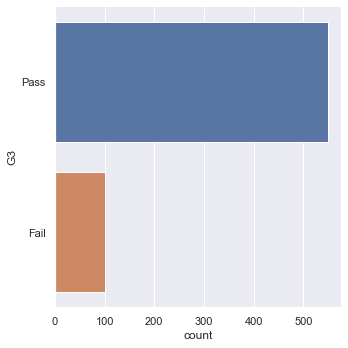

In [12]:
# Draw the distribution of Response
sb.catplot(y = "G3", data = G3obj, kind = "count")

### A decision tree of depth 4 is used.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9506172839506173

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.950920245398773



<AxesSubplot:>

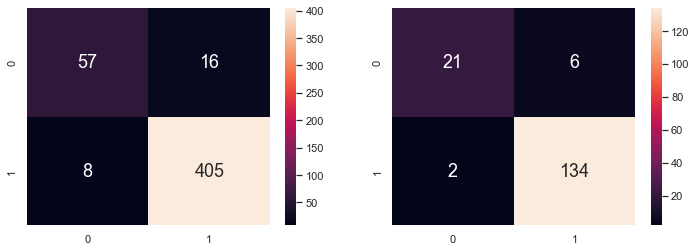

In [13]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(pred_train, G3_train)  # train the decision tree model

# Predict Response corresponding to Predictors
G3_train_pred = dectree.predict(pred_train)
G3_test_pred = dectree.predict(pred_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(pred_train, G3_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(pred_test, G3_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(G3_train, G3_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(G3_test, G3_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(1767.7440000000001, 3522.5280000000002, 'G2 <= 8.5\ngini = 0.255\nsamples = 486\nvalue = [73, 413]\nclass = Fail'),
 Text(803.52, 2739.744, 'G1 <= 8.5\ngini = 0.211\nsamples = 50\nvalue = [44, 6]\nclass = Pass'),
 Text(321.408, 1956.96, 'Medu 2 <= 0.5\ngini = 0.05\nsamples = 39\nvalue = [38, 1]\nclass = Pass'),
 Text(160.704, 1174.176, 'gini = 0.0\nsamples = 27\nvalue = [27, 0]\nclass = Pass'),
 Text(482.112, 1174.176, 'Walc 1 <= 0.5\ngini = 0.153\nsamples = 12\nvalue = [11, 1]\nclass = Pass'),
 Text(321.408, 391.3920000000003, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]\nclass = Pass'),
 Text(642.816, 391.3920000000003, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = Pass'),
 Text(1285.632, 1956.96, 'Walc 3 <= 0.5\ngini = 0.496\nsamples = 11\nvalue = [6, 5]\nclass = Pass'),
 Text(1124.928, 1174.176, 'failures <= 1.5\ngini = 0.375\nsamples = 8\nvalue = [6, 2]\nclass = Pass'),
 Text(964.224, 391.3920000000003, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]\nclass = Pass'),
 Text(1285

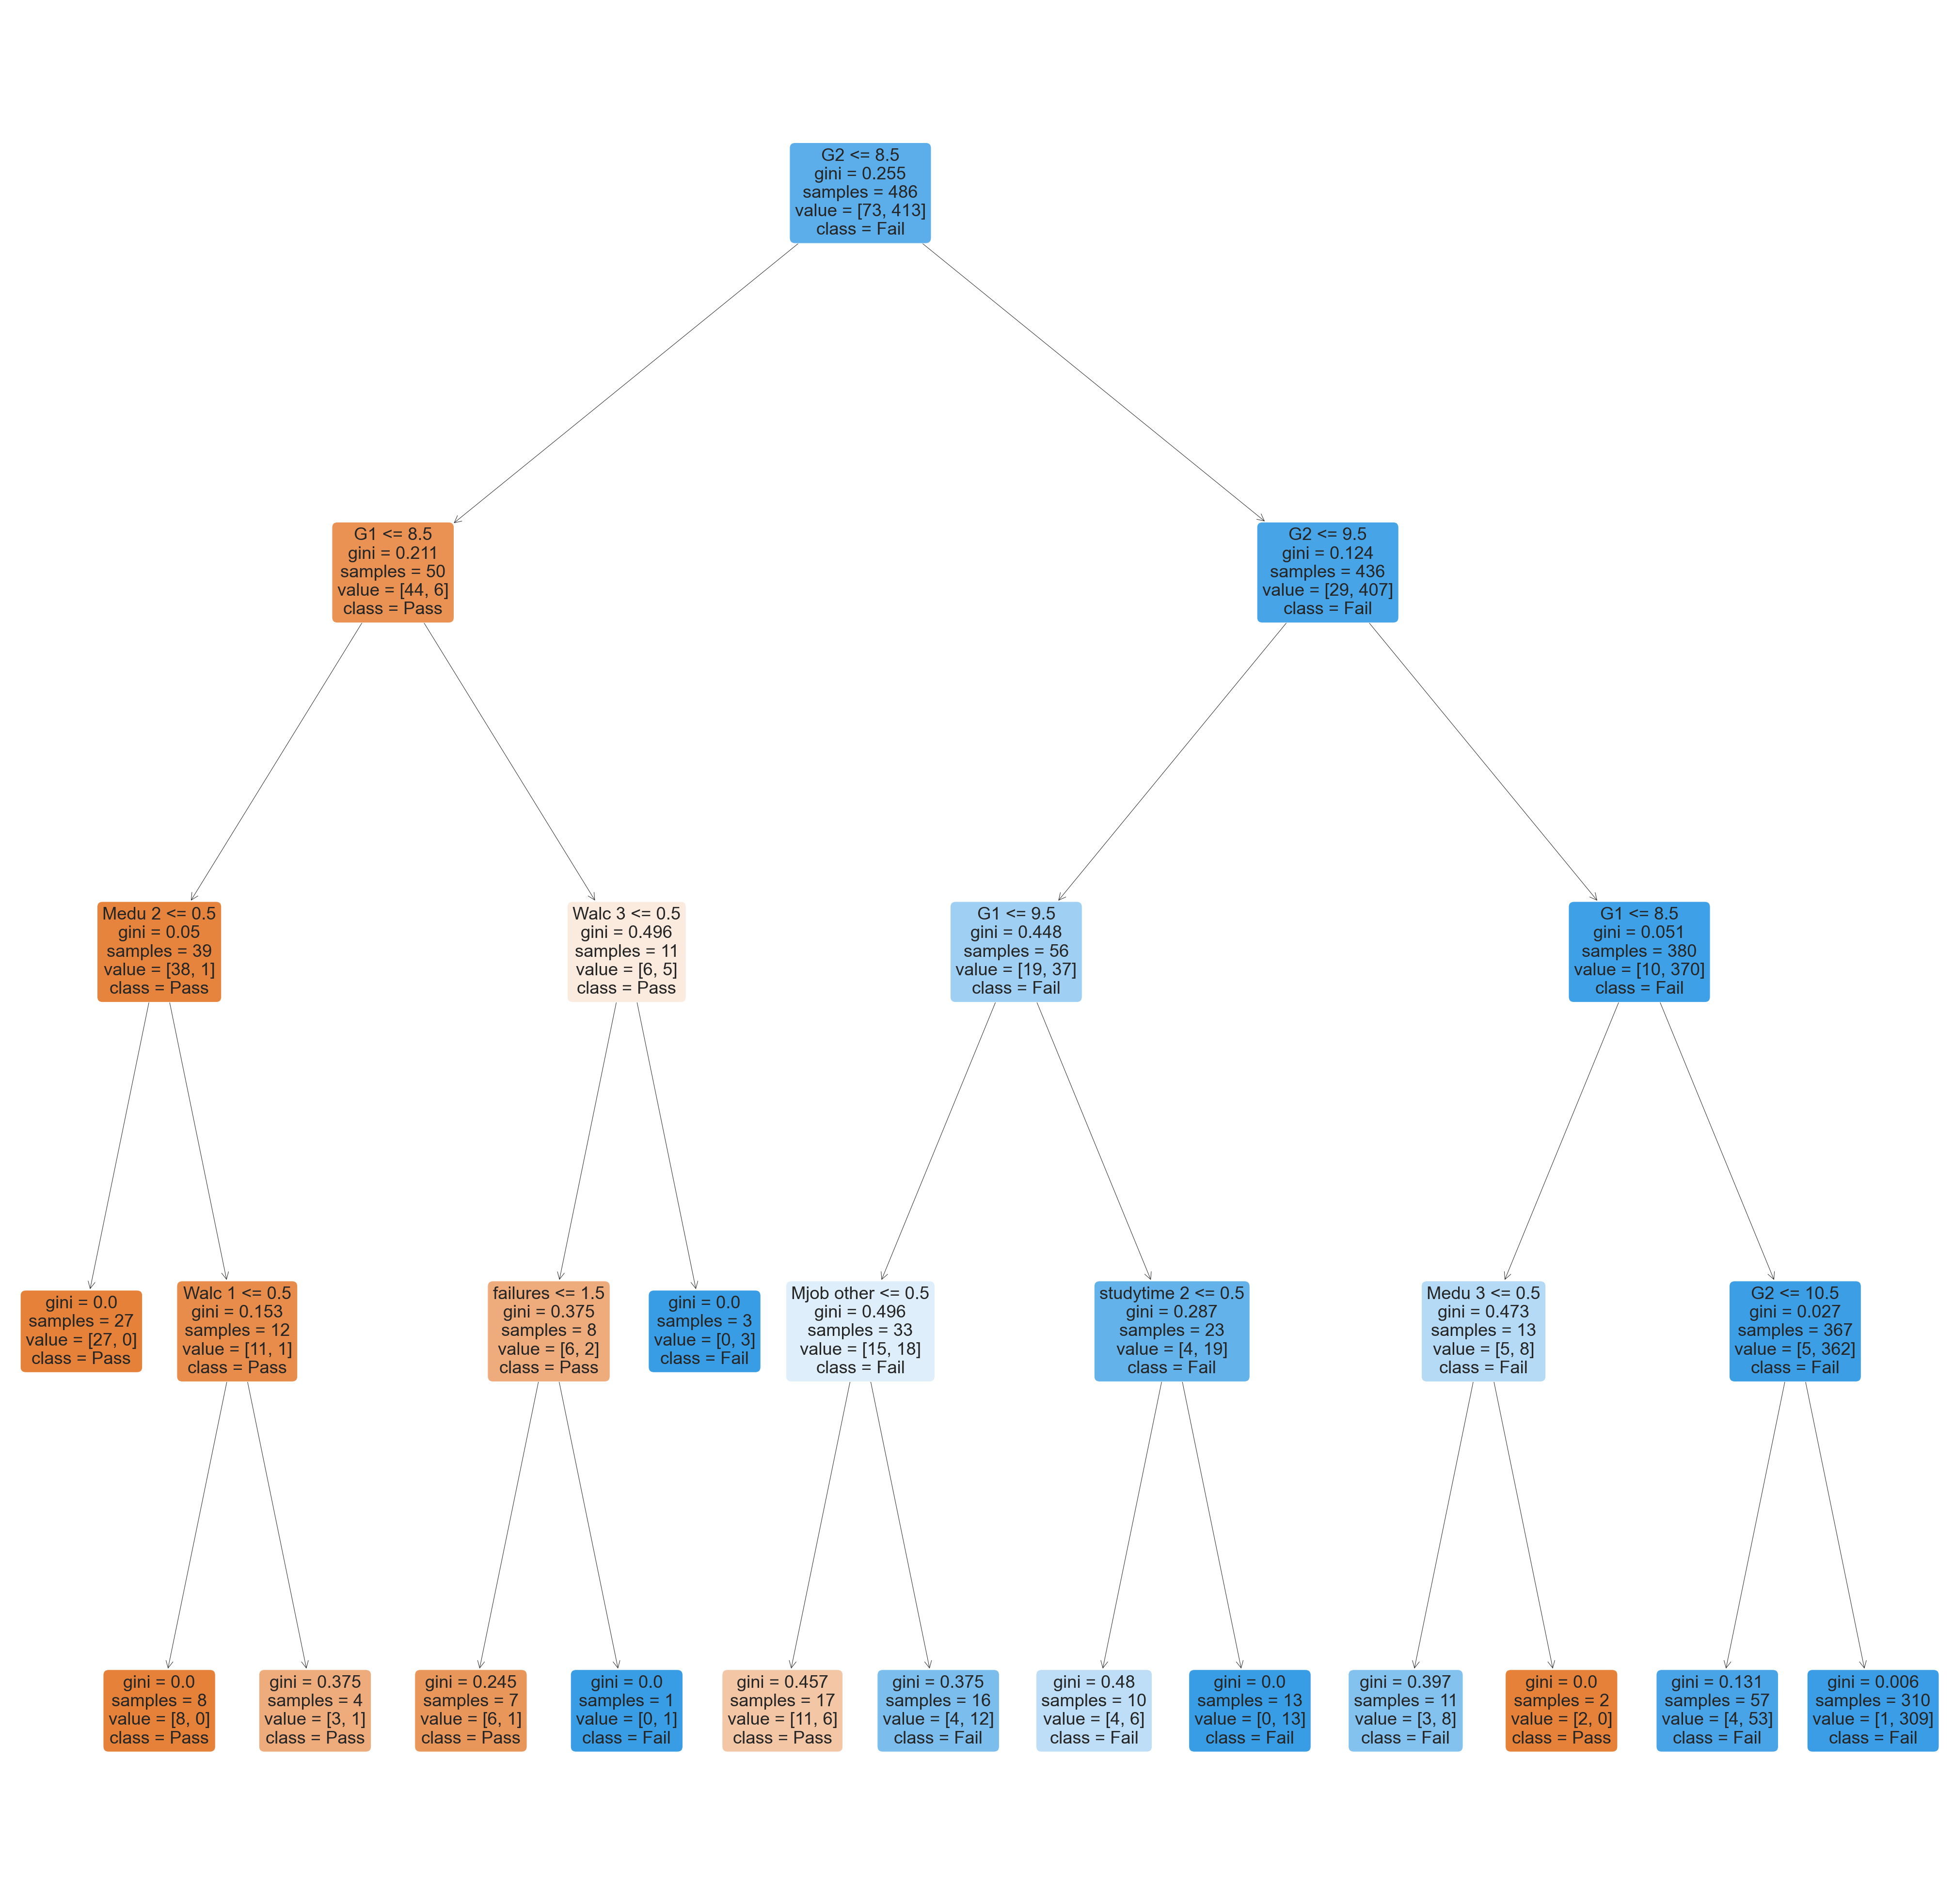

In [14]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(72, 72))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=pred_train.columns, 
          class_names=["Pass", "Fail"])

-------------------------------------------------------------------------------------------------------------------------

### G3 is split into 4 bands.

In [15]:
G3 = pd.DataFrame(student_por['G3'])
G3

,G3
0,11.0
1,11.0
2,12.0
3,14.0
4,13.0
...,...
644,10.0
645,16.0
646,9.0
647,10.0


In [16]:
G3Band = pd.DataFrame()

G3Band['G3'] = pd.DataFrame(student_por['G3']).replace([0, 1, 2, 3, 4], 'Band 1')
G3Band['G3'] = pd.DataFrame(G3Band['G3']).replace([5, 6, 7, 8, 9], 'Band 2')
G3Band['G3'] = pd.DataFrame(G3Band['G3']).replace([10, 11, 12, 13, 14], 'Band 3')
G3Band['G3'] = pd.DataFrame(G3Band['G3']).replace([15, 16, 17, 18, 19], 'Band 4')

G3Band

,G3
0,Band 3
1,Band 3
2,Band 3
3,Band 3
4,Band 3
...,...
644,Band 3
645,Band 4
646,Band 2
647,Band 3


In [17]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Split the Dataset into Train and Test
pred_train, pred_test, G3Band_train, G3Band_test = train_test_split(predictors, G3Band, test_size = 0.25)

# Check the sample sizes
print("Train Set :", G3Band_train.shape, pred_train.shape)
print("Test Set  :", G3Band_test.shape, pred_test.shape)

Train Set : (486, 1) (486, 37)
Test Set  : (163, 1) (163, 37)


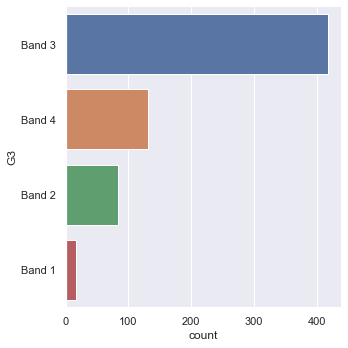

In [18]:
# Draw the distribution of Response
sb.catplot(y = "G3", data = G3Band, kind = "count")

### A decision tree of depth 4 is used. 

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9032921810699589

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8588957055214724



<AxesSubplot:>

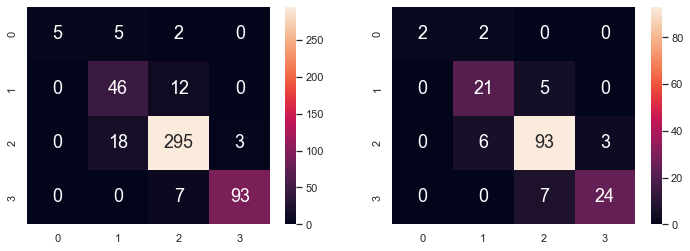

In [19]:
# Decision Tree using Train Data
dectreeBand = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectreeBand.fit(pred_train, G3Band_train)  # train the decision tree model

# Predict Response corresponding to Predictors
G3Band_train_pred = dectreeBand.predict(pred_train)
G3Band_test_pred = dectreeBand.predict(pred_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectreeBand.score(pred_train, G3Band_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectreeBand.score(pred_test, G3Band_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(G3Band_train, G3Band_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(G3Band_test, G3Band_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [24]:
conf_mat = np.array(
    [[2,2,0,0],
    [0,21,5,0],
    [0,6,93,3],
    [0,0,7,24]])

In [25]:
def get_tpr_fnr_fpr_tnr(cm):
    """
    This function returns class-wise TPR, FNR, FPR & TNR
    [[cm]]: a 2-D array of a multiclass confusion matrix
            where horizontal axes represent actual classes
            and vertical axes represent predicted classes
    {output}: a dictionary of class-wise accuracy parameters
    """
    dict_metric = dict()
    n = len(cm[0])
    row_sums = cm.sum(axis=1)
    col_sums = cm.sum(axis=0)
    array_sum = sum(sum(cm))
    #initialize a blank nested dictionary
    for i in range(1, n+1):
        keys = str(i)
        dict_metric[keys] = {"TPR":0, "FNR":0, "FPR":0, "TNR":0}
    # calculate and store class-wise TPR, FNR, FPR, TNR
    for i in range(n):
        for j in range(n):
            if i == j:
                keys = str(i+1)
                tp = cm[i, j]
                fn = row_sums[i] - cm[i, j]
                dict_metric[keys]["TPR"] = tp / (tp + fn)
                dict_metric[keys]["FNR"] = fn / (tp + fn)
                fp = col_sums[i] - cm[i, j]
                tn = array_sum - tp - fn - fp
                dict_metric[keys]["FPR"] = fp / (fp + tn)
                dict_metric[keys]["TNR"] = tn / (fp + tn)
    return dict_metric

In [26]:
df = pd.DataFrame(get_tpr_fnr_fpr_tnr(conf_mat)).transpose()
df

,TPR,FNR,FPR,TNR
1,0.500000,0.500000,0.000000,1.000000
2,0.807692,0.192308,0.058394,0.941606
3,0.911765,0.088235,0.196721,0.803279
4,0.774194,0.225806,0.022727,0.977273


In [27]:
df.describe()

,TPR,FNR,FPR,TNR
count,4.000000,4.000000,4.000000,4.000000
mean,0.748413,0.251587,0.069461,0.930539
std,0.175662,0.175662,0.088179,0.088179
min,0.500000,0.088235,0.000000,0.803279
25%,0.705645,0.166290,0.017045,0.907024
50%,0.790943,0.209057,0.040561,0.959439
75%,0.833710,0.294355,0.092976,0.982955
max,0.911765,0.500000,0.196721,1.000000


[Text(2022.75, 2935.44, 'G2 <= 13.5\ngini = 0.52\nsamples = 486\nvalue = [12, 58, 316, 100]\nclass = Band 3'),
 Text(1116.0, 2283.12, 'G2 <= 8.5\ngini = 0.331\nsamples = 369\nvalue = [12, 58, 296, 3]\nclass = Band 3'),
 Text(558.0, 1630.8000000000002, 'absences <= 1.0\ngini = 0.492\nsamples = 52\nvalue = [10, 35, 7, 0]\nclass = Band 2'),
 Text(279.0, 978.48, 'G2 <= 3.0\ngini = 0.568\nsamples = 18\nvalue = [10, 6, 2, 0]\nclass = Band 1'),
 Text(139.5, 326.1600000000003, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0, 0]\nclass = Band 1'),
 Text(418.5, 326.1600000000003, 'gini = 0.615\nsamples = 13\nvalue = [5, 6, 2, 0]\nclass = Band 2'),
 Text(837.0, 978.48, 'G1 <= 8.5\ngini = 0.251\nsamples = 34\nvalue = [0, 29, 5, 0]\nclass = Band 2'),
 Text(697.5, 326.1600000000003, 'gini = 0.083\nsamples = 23\nvalue = [0, 22, 1, 0]\nclass = Band 2'),
 Text(976.5, 326.1600000000003, 'gini = 0.463\nsamples = 11\nvalue = [0, 7, 4, 0]\nclass = Band 2'),
 Text(1674.0, 1630.8000000000002, 'G1 <= 8.5\ngini = 0

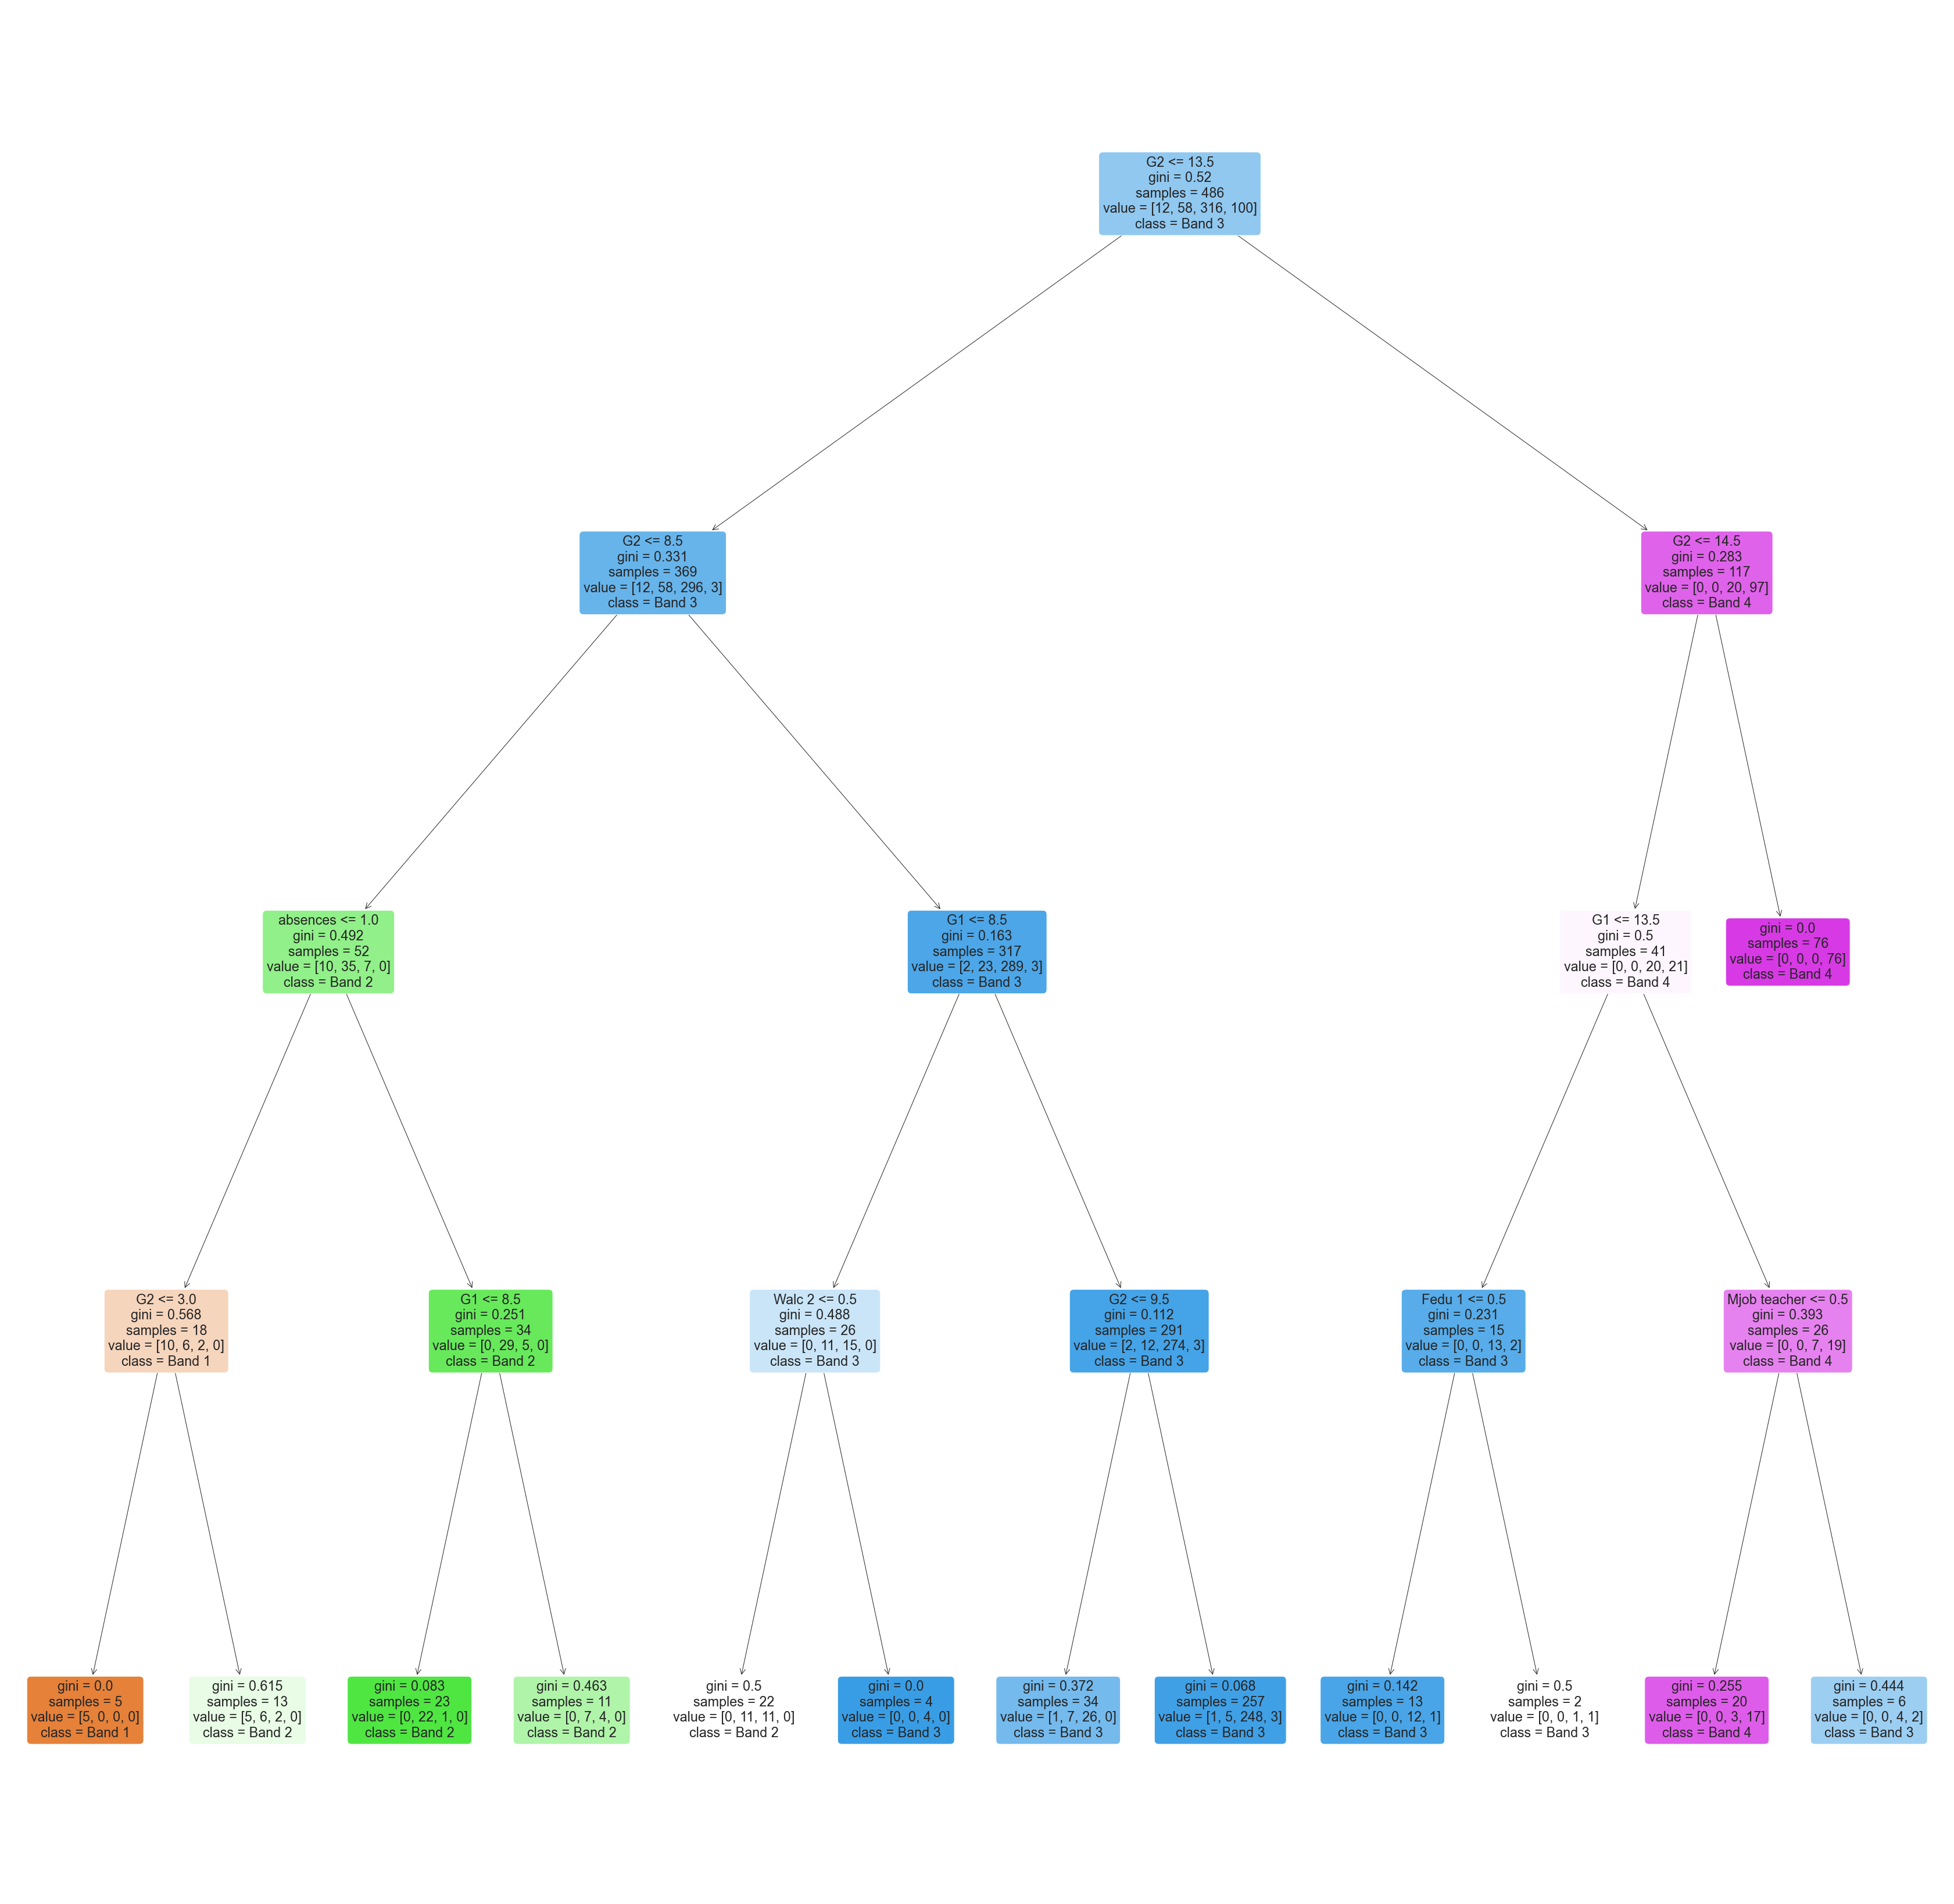

In [23]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(60, 60))
plot_tree(dectreeBand, filled=True, rounded=True, 
          feature_names=pred_train.columns, 
          class_names=["Band 1", "Band 2", "Band 3", "Band 4"])